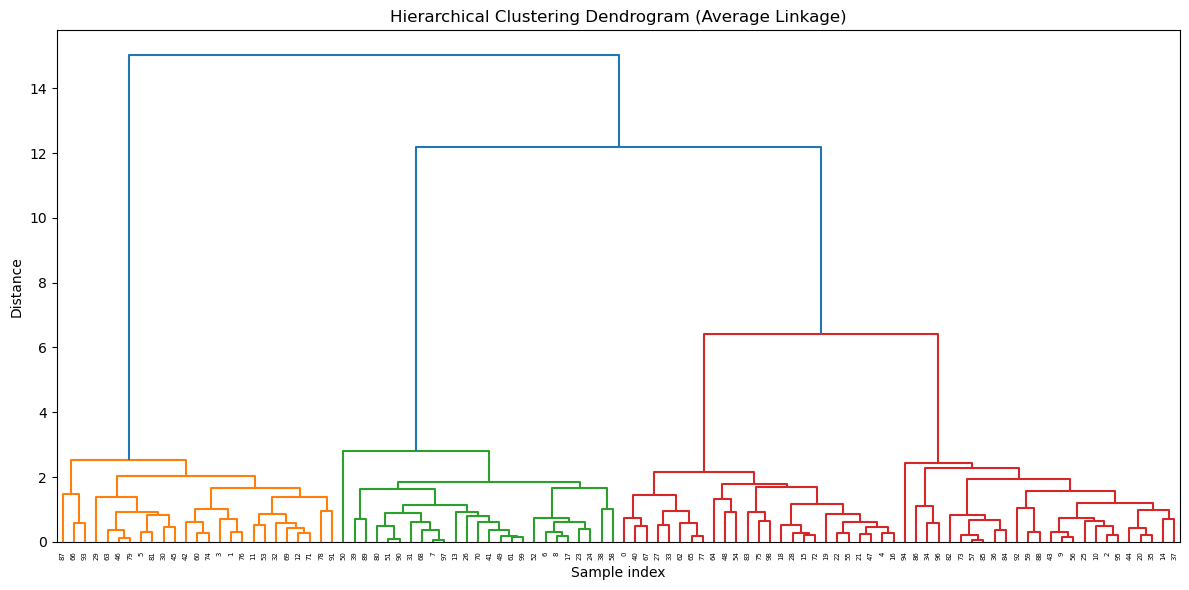

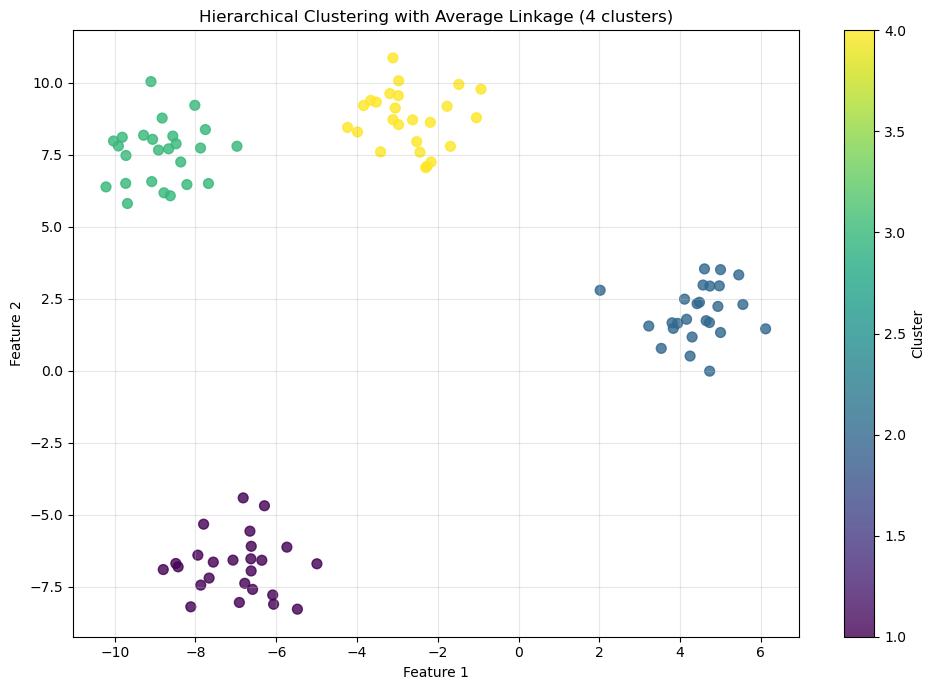

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs

# Generate sample data
X, y = make_blobs(n_samples=100, centers=4, random_state=42)

# Perform hierarchical clustering using average linkage
Z = linkage(X, method='average')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram (Average Linkage)')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

# Determine clusters by cutting the dendrogram
from scipy.cluster.hierarchy import fcluster
# Cut the dendrogram to get 4 clusters
cluster_labels = fcluster(Z, 4, criterion='maxclust')

# Plot the clustered data
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.8)
plt.title('Hierarchical Clustering with Average Linkage (4 clusters)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [2]:
import numpy as np
from scipy.spatial.distance import squareform

def hierarchical_clustering_average_linkage(distance_matrix, labels):
    # Convert to condensed form for easier manipulation
    current_dist = distance_matrix.copy()
    clusters = [[label] for label in labels]
    
    step = 1
    while len(clusters) > 1:
        print(f"\nStep {step}:")
        step += 1
        
        # Find the two closest clusters
        min_dist = np.inf
        for i in range(len(clusters)):
            for j in range(i+1, len(clusters)):
                if current_dist[i,j] < min_dist:
                    min_dist = current_dist[i,j]
                    merge_i, merge_j = i, j
        
        # Merge the two closest clusters
        new_cluster = clusters[merge_i] + clusters[merge_j]
        print(f"Merging clusters {clusters[merge_i]} and {clusters[merge_j]} with distance {min_dist:.2f}")
        
        # Create new distance matrix
        new_clusters = [clusters[k] for k in range(len(clusters)) if k != merge_i and k != merge_j]
        new_clusters.append(new_cluster)
        
        new_dist = np.zeros((len(new_clusters), len(new_clusters)))
        
        # Fill in distances for existing clusters
        new_indices = {k: i for i, k in enumerate([idx for idx in range(len(clusters)) if idx != merge_i and idx != merge_j])}
        new_indices[merge_i] = len(new_clusters) - 1  # The merged cluster gets the last index
        
        # Copy unchanged distances
        for i in range(len(clusters)):
            for j in range(len(clusters)):
                if i != merge_i and i != merge_j and j != merge_i and j != merge_j:
                    new_i = new_indices[i]
                    new_j = new_indices[j]
                    new_dist[new_i, new_j] = current_dist[i,j]
        
        # Calculate new distances using average linkage
        for k in range(len(clusters)):
            if k != merge_i and k != merge_j:
                # Calculate average distance between new cluster and cluster k
                total = 0
                count = 0
                for point_i in clusters[merge_i] + clusters[merge_j]:
                    for point_j in clusters[k]:
                        # Get original point indices
                        idx_i = labels.index(point_i)
                        idx_j = labels.index(point_j)
                        total += distance_matrix[idx_i, idx_j]
                        count += 1
                avg_dist = total / count
                
                new_k = new_indices[k]
                new_dist[len(new_clusters)-1, new_k] = avg_dist
                new_dist[new_k, len(new_clusters)-1] = avg_dist
        
        # Print current clusters and distance matrix
        print("\nCurrent clusters:")
        for i, cluster in enumerate(new_clusters):
            print(f"Cluster {i+1}: {cluster}")
        
        print("\nDistance matrix:")
        print("      " + "   ".join([f"C{i+1}" for i in range(len(new_clusters))]))
        for i in range(len(new_clusters)):
            print(f"C{i+1}  " + "  ".join([f"{new_dist[i,j]:.2f}" for j in range(len(new_clusters))]))
        
        # Update for next iteration
        clusters = new_clusters
        current_dist = new_dist

# Given distance matrix
labels = ['g1', 'g2', 'g3', 'g4', 'g5', 'g6', 'g7', 'g8', 'g9', 'g10']
distance_matrix = np.array([
    [0.0, 8.1, 9.2, 7.7, 9.3, 2.3, 5.1, 10.2, 6.1, 7.0],
    [8.1, 0.0, 12.0, 0.9, 12.0, 9.5, 10.1, 12.8, 2.0, 1.0],
    [9.2, 12.0, 0.0, 11.2, 0.7, 11.1, 8.1, 1.1, 10.5, 11.5],
    [7.7, 0.9, 11.2, 0.0, 11.2, 9.2, 9.5, 12.0, 1.6, 1.1],
    [9.3, 12.0, 0.7, 11.2, 0.0, 11.2, 8.5, 1.0, 10.6, 11.6],
    [2.3, 9.5, 11.1, 9.2, 11.2, 0.0, 5.6, 12.1, 7.7, 8.5],
    [5.1, 10.1, 8.1, 9.5, 8.5, 5.6, 0.0, 9.1, 8.3, 9.3],
    [10.2, 12.8, 1.1, 12.0, 1.0, 12.1, 9.1, 0.0, 11.4, 12.4],
    [6.1, 2.0, 10.5, 1.6, 10.6, 7.7, 8.3, 11.4, 0.0, 1.1],
    [7.0, 1.0, 11.5, 1.1, 11.6, 8.5, 9.3, 12.4, 1.1, 0.0]
])

print("Initial distance matrix:")
print("      " + "   ".join(labels))
for i in range(len(labels)):
    print(f"{labels[i]}  " + "  ".join([f"{distance_matrix[i,j]:.2f}" for j in range(len(labels))]))

hierarchical_clustering_average_linkage(distance_matrix, labels)

Initial distance matrix:
      g1   g2   g3   g4   g5   g6   g7   g8   g9   g10
g1  0.00  8.10  9.20  7.70  9.30  2.30  5.10  10.20  6.10  7.00
g2  8.10  0.00  12.00  0.90  12.00  9.50  10.10  12.80  2.00  1.00
g3  9.20  12.00  0.00  11.20  0.70  11.10  8.10  1.10  10.50  11.50
g4  7.70  0.90  11.20  0.00  11.20  9.20  9.50  12.00  1.60  1.10
g5  9.30  12.00  0.70  11.20  0.00  11.20  8.50  1.00  10.60  11.60
g6  2.30  9.50  11.10  9.20  11.20  0.00  5.60  12.10  7.70  8.50
g7  5.10  10.10  8.10  9.50  8.50  5.60  0.00  9.10  8.30  9.30
g8  10.20  12.80  1.10  12.00  1.00  12.10  9.10  0.00  11.40  12.40
g9  6.10  2.00  10.50  1.60  10.60  7.70  8.30  11.40  0.00  1.10
g10  7.00  1.00  11.50  1.10  11.60  8.50  9.30  12.40  1.10  0.00

Step 1:
Merging clusters ['g3'] and ['g5'] with distance 0.70

Current clusters:
Cluster 1: ['g1']
Cluster 2: ['g2']
Cluster 3: ['g4']
Cluster 4: ['g6']
Cluster 5: ['g7']
Cluster 6: ['g8']
Cluster 7: ['g9']
Cluster 8: ['g10']
Cluster 9: ['g3', 'g5']

Dis

In [3]:
import numpy as np

def print_clusters_and_matrix(clusters, dist_matrix, step, merge_info=None):
    print(f"\nStep {step}:")
    if merge_info:
        print(f"Merging clusters {merge_info[0]} and {merge_info[1]} with distance {merge_info[2]:.2f}")
    
    print("\nCurrent clusters:")
    for i, cluster in enumerate(clusters):
        print(f"Cluster {i+1}: {cluster}")
    
    print("\nDistance matrix:")
    header = "      " + "   ".join([f"C{i+1}" for i in range(len(clusters))])
    print(header)
    for i in range(len(clusters)):
        row = f"C{i+1}  " + "  ".join([f"{dist_matrix[i,j]:.2f}" for j in range(len(clusters))])
        print(row)

def hierarchical_clustering(distance_matrix, labels, linkage='average'):
    # Initialize
    current_dist = distance_matrix.copy()
    clusters = [[label] for label in labels]
    step = 0
    
    print(f"\nInitial distance matrix ({linkage} linkage):")
    print_clusters_and_matrix(clusters, current_dist, step)
    
    while len(clusters) > 1:
        step += 1
        
        # Find the two closest clusters
        min_dist = np.inf
        for i in range(len(clusters)):
            for j in range(i+1, len(clusters)):
                if current_dist[i,j] < min_dist:
                    min_dist = current_dist[i,j]
                    merge_i, merge_j = i, j
        
        # Merge the two closest clusters
        new_cluster = clusters[merge_i] + clusters[merge_j]
        merge_info = (clusters[merge_i], clusters[merge_j], min_dist)
        
        # Create new distance matrix
        new_clusters = [clusters[k] for k in range(len(clusters)) if k != merge_i and k != merge_j]
        new_clusters.append(new_cluster)
        new_dist = np.zeros((len(new_clusters), len(new_clusters)))
        
        # Fill in distances for existing clusters
        new_indices = {k: i for i, k in enumerate([idx for idx in range(len(clusters)) if idx != merge_i and idx != merge_j])}
        new_indices[merge_i] = len(new_clusters) - 1  # The merged cluster gets the last index
        
        # Copy unchanged distances
        for i in range(len(clusters)):
            for j in range(len(clusters)):
                if i != merge_i and i != merge_j and j != merge_i and j != merge_j:
                    new_i = new_indices[i]
                    new_j = new_indices[j]
                    new_dist[new_i, new_j] = current_dist[i,j]
        
        # Calculate new distances based on linkage method
        for k in range(len(clusters)):
            if k != merge_i and k != merge_j:
                if linkage == 'average':
                    # Average linkage calculation
                    total = 0
                    count = 0
                    for point_i in clusters[merge_i] + clusters[merge_j]:
                        for point_j in clusters[k]:
                            idx_i = labels.index(point_i)
                            idx_j = labels.index(point_j)
                            total += distance_matrix[idx_i, idx_j]
                            count += 1
                    avg_dist = total / count
                    new_dist_val = avg_dist
                elif linkage == 'single':
                    # Single linkage calculation (minimum distance)
                    min_d = np.inf
                    for point_i in clusters[merge_i] + clusters[merge_j]:
                        for point_j in clusters[k]:
                            idx_i = labels.index(point_i)
                            idx_j = labels.index(point_j)
                            if distance_matrix[idx_i, idx_j] < min_d:
                                min_d = distance_matrix[idx_i, idx_j]
                    new_dist_val = min_d
                
                new_k = new_indices[k]
                new_dist[len(new_clusters)-1, new_k] = new_dist_val
                new_dist[new_k, len(new_clusters)-1] = new_dist_val
        
        # Print current state
        print_clusters_and_matrix(new_clusters, new_dist, step, merge_info)
        
        # Update for next iteration
        clusters = new_clusters
        current_dist = new_dist

# Given distance matrix
labels = ['g1', 'g2', 'g3', 'g4', 'g5', 'g6', 'g7', 'g8', 'g9', 'g10']
distance_matrix = np.array([
    [0.0, 8.1, 9.2, 7.7, 9.3, 2.3, 5.1, 10.2, 6.1, 7.0],
    [8.1, 0.0, 12.0, 0.9, 12.0, 9.5, 10.1, 12.8, 2.0, 1.0],
    [9.2, 12.0, 0.0, 11.2, 0.7, 11.1, 8.1, 1.1, 10.5, 11.5],
    [7.7, 0.9, 11.2, 0.0, 11.2, 9.2, 9.5, 12.0, 1.6, 1.1],
    [9.3, 12.0, 0.7, 11.2, 0.0, 11.2, 8.5, 1.0, 10.6, 11.6],
    [2.3, 9.5, 11.1, 9.2, 11.2, 0.0, 5.6, 12.1, 7.7, 8.5],
    [5.1, 10.1, 8.1, 9.5, 8.5, 5.6, 0.0, 9.1, 8.3, 9.3],
    [10.2, 12.8, 1.1, 12.0, 1.0, 12.1, 9.1, 0.0, 11.4, 12.4],
    [6.1, 2.0, 10.5, 1.6, 10.6, 7.7, 8.3, 11.4, 0.0, 1.1],
    [7.0, 1.0, 11.5, 1.1, 11.6, 8.5, 9.3, 12.4, 1.1, 0.0]
])

# Run both linkage methods
print("="*80)
print("HIERARCHICAL CLUSTERING WITH AVERAGE LINKAGE")
print("="*80)
hierarchical_clustering(distance_matrix, labels, linkage='average')

print("\n" + "="*80)
print("HIERARCHICAL CLUSTERING WITH SINGLE LINKAGE")
print("="*80)
hierarchical_clustering(distance_matrix, labels, linkage='single')

HIERARCHICAL CLUSTERING WITH AVERAGE LINKAGE

Initial distance matrix (average linkage):

Step 0:

Current clusters:
Cluster 1: ['g1']
Cluster 2: ['g2']
Cluster 3: ['g3']
Cluster 4: ['g4']
Cluster 5: ['g5']
Cluster 6: ['g6']
Cluster 7: ['g7']
Cluster 8: ['g8']
Cluster 9: ['g9']
Cluster 10: ['g10']

Distance matrix:
      C1   C2   C3   C4   C5   C6   C7   C8   C9   C10
C1  0.00  8.10  9.20  7.70  9.30  2.30  5.10  10.20  6.10  7.00
C2  8.10  0.00  12.00  0.90  12.00  9.50  10.10  12.80  2.00  1.00
C3  9.20  12.00  0.00  11.20  0.70  11.10  8.10  1.10  10.50  11.50
C4  7.70  0.90  11.20  0.00  11.20  9.20  9.50  12.00  1.60  1.10
C5  9.30  12.00  0.70  11.20  0.00  11.20  8.50  1.00  10.60  11.60
C6  2.30  9.50  11.10  9.20  11.20  0.00  5.60  12.10  7.70  8.50
C7  5.10  10.10  8.10  9.50  8.50  5.60  0.00  9.10  8.30  9.30
C8  10.20  12.80  1.10  12.00  1.00  12.10  9.10  0.00  11.40  12.40
C9  6.10  2.00  10.50  1.60  10.60  7.70  8.30  11.40  0.00  1.10
C10  7.00  1.00  11.50  1.10  